# Penguin. 

In this notebook we shall be exploring the Palmer penguin dataset that was collected by scientists in Antarctica at the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

In [9]:
import pandas as pd
from IPython.display import display

penguin_df=pd.read_csv('./penguins_size.csv')
display(penguin_df.head(10))
display(*penguin_df.species.unique())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


'Adelie'

'Chinstrap'

'Gentoo'

## Check for missing values. 

Now that we have seen the basic shape of the data it's time to figure out whether our data has any significant amount of missing values in any of the columns. A great tool to visualize missing values quickly is using a **Seaborn Heatmap** don't worry about seaborn right now, just know that it's another graphing library built on top of matplotlib with an aim of providing crisper visuals.

<AxesSubplot:>

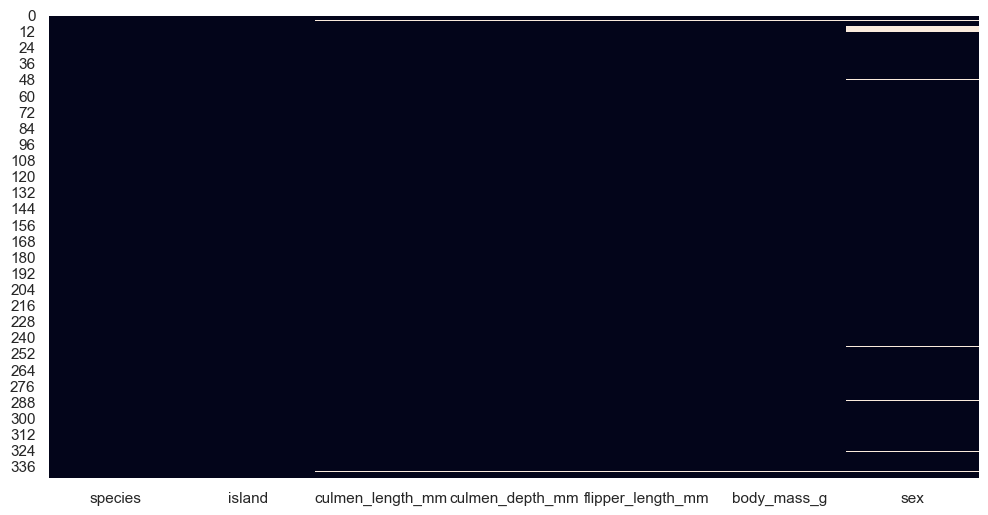

In [7]:
import seaborn as sns

sns.heatmap(penguin_df.isnull(), cbar=False)

As we can see, there aren't a lot of missing values in our dataset therefore we may safely proceed to figuring out the relationships between the given parameters. We will also remove the parameters related to the penguins' culmen(the ridge that runs along the birds' beaks) since patterns contained in that data are to be found by the audience for homework.

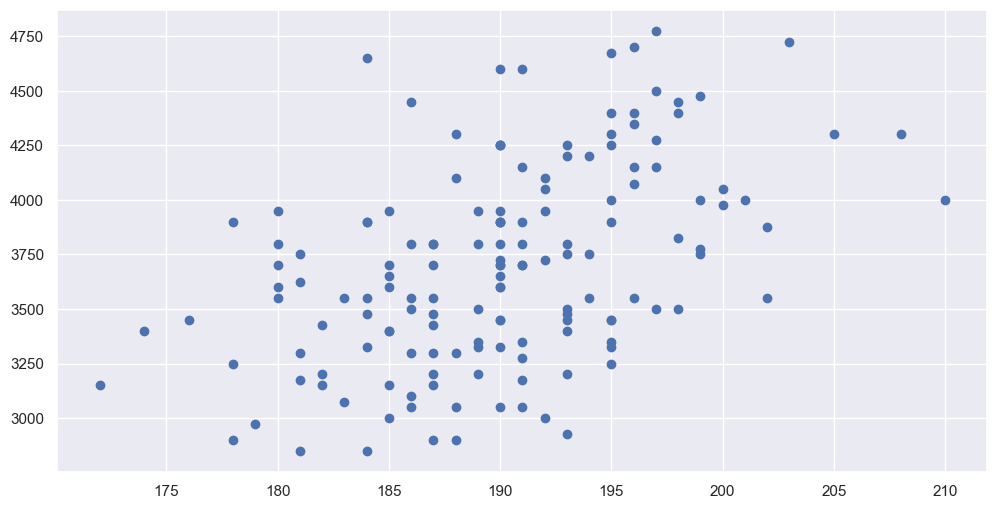

In [25]:
penguin_df.drop(columns=['culmen_length_mm','culmen_depth_mm'])

from matplotlib import pyplot as plt
# We start out byt trying to figure the relation between the flipper length and mass of a penguin
adelie_data=penguin_df.loc[penguin_df['species']=='Adelie']
plt.scatter(adelie_data['flipper_length_mm'], adelie_data['body_mass_g'])

Well... that's nothing interesting I hear you say, however I would invite you to closely see the data points in the figure, all of them are in a general rectangular region and seem to be clustered around a certain shape within 50 grams of each other on the weight axis, what shape you ask? Why, a **line** of course. don't believe me? see for yourself.

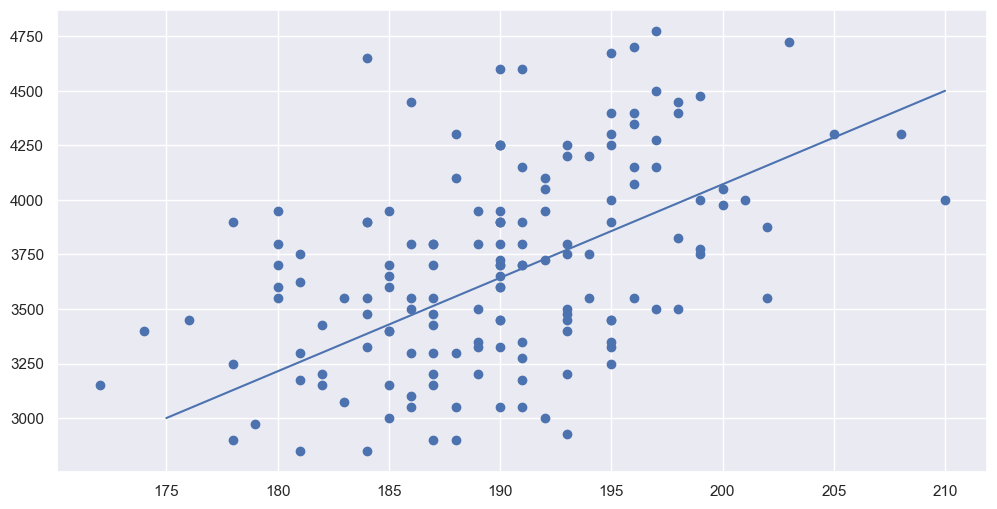

In [27]:
y_approx=[3000,4500]
x_approx=[175,210]

display(plt.plot(x_approx, y_approx))
display(plt.scatter(adelie_data['flipper_length_mm'], adelie_data['body_mass_g']))

Text(0.5, 1.0, 'Gentoo')

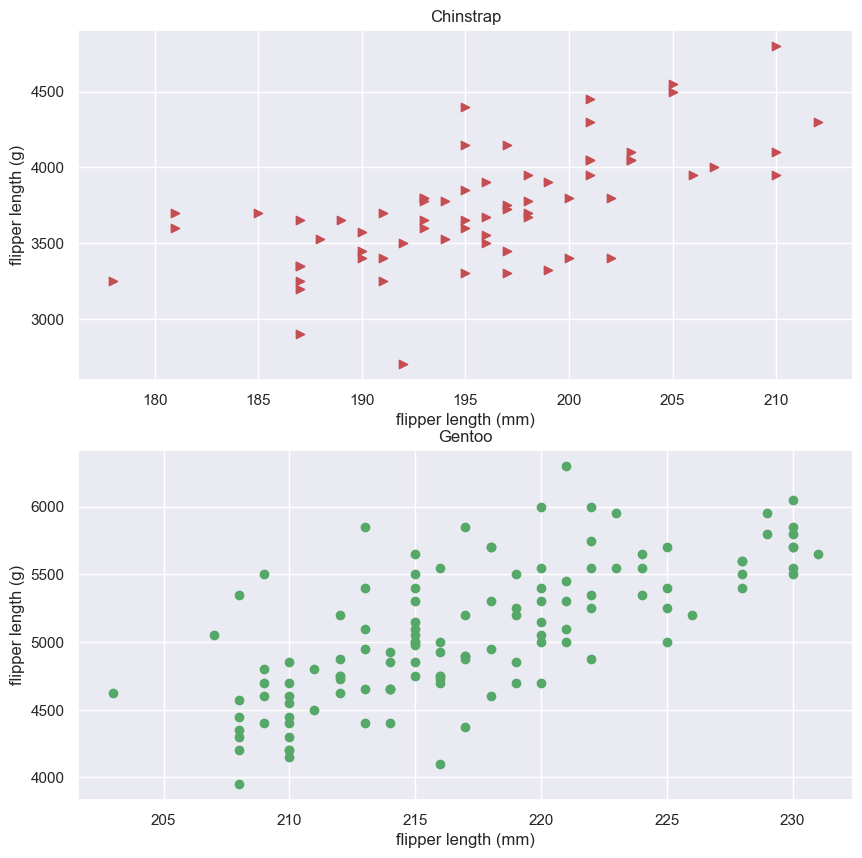

In [37]:
# A similar Analysis can also be performed on the other species. To compare the data on the same figure you may use the subplots method.

chinstrap_data=penguin_df.loc[penguin_df['species']=='Chinstrap']
gentoo_data=penguin_df.loc[penguin_df['species']=='Gentoo']

fig, axs = plt.subplots(2,1, figsize=(10,10))

axs[0].scatter(chinstrap_data['flipper_length_mm'], chinstrap_data['body_mass_g'],marker='>', color='r')
axs[0].set_xlabel('flipper length (mm)')
axs[0].set_ylabel('flipper length (g)')
axs[0].set_title('Chinstrap')

axs[1].scatter(gentoo_data['flipper_length_mm'], gentoo_data['body_mass_g'], marker='o', color='g')
axs[1].set_xlabel('flipper length (mm)')
axs[1].set_ylabel('flipper length (g)')
axs[1].set_title('Gentoo')


As can be seen from the subplots these data points also follow a rough linear model. The importance of these data points being clustered around a line is that **Linear Regression** now becomes a valid approach to try and predict the weight of a penguin based on it's flipper length. We will now move on to inter-species comparisons. Lets try and get all the flipper and weight data onto a single plot for Adelies and Gentoos.

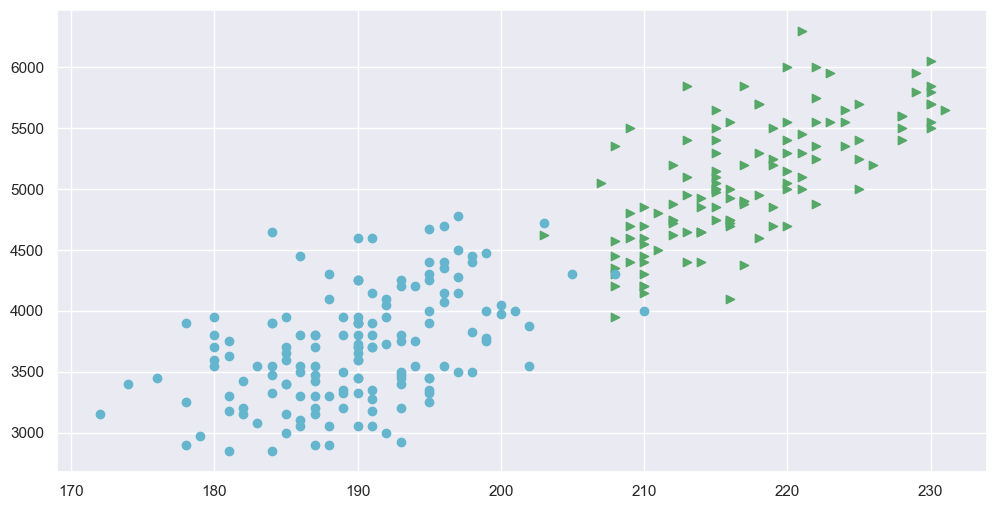

In [42]:
display(plt.scatter(gentoo_data['flipper_length_mm'], gentoo_data['body_mass_g'], marker='>', color='g'))
display(plt.scatter(adelie_data['flipper_length_mm'], adelie_data['body_mass_g'], marker='o', color='c'))

We now have ourselves an interesting observation. Most Adelies have flippers smaller than 200 mm while also wighing less than 5000 g. Most Gentoos on the other hand have much longer flippers while also weighing significantly more. If we draw an imaginary line between these two clusters of points we can devise a system a classification where any new data point to the right of the line will indicate that the penguin is a Gentoo and anything to the left indicates an Adelie... *et voila* you now understand how the SVM(simple vector machine) algorithm works. Unfortunately such a simple distinction does not exist between the Adelies and the Chinstraps as shown by the figure below.

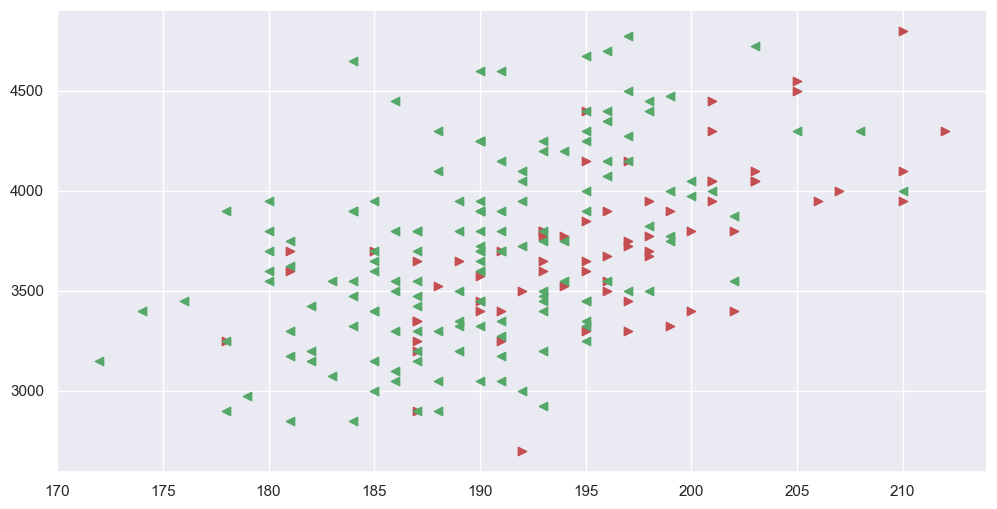

In [44]:
display(plt.scatter(chinstrap_data['flipper_length_mm'], chinstrap_data['body_mass_g'], marker='>', color='r'))
display(plt.scatter(adelie_data['flipper_length_mm'], adelie_data['body_mass_g'], marker='<', color='g'))

Perhaps a pattern that establishes distinction between the Adelies and Chinstraps maybe found by using the data that we dropped all the way back in the second cell... And that's what make data visualization interesting, the audience is encouraged to try and find the pattern by themselves. 

## Conclusion

Well... that was a brief intro to data visualisatiion using matplotlib, hopefully the audience was able to understand the extraordinary power and simplicity of this library. I also hope that the audience was able to take away more from this than a bunch of ways to draw graphs using a library and rather really understood that it is the ability to see data in the right way and being able to find patterns in it that's really important and worth learning.

That's it from my side! Peace!